# Домашнее задание 3

Это домашнее задание по материалам 6-8 недели семестра (6-8 лекции и 5-7 семинары). Дедлайн по отправке - 23:59 12 ноября.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Номер группы_Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Б05-100_Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __МФТИ_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __МФТИ_3__.

- Для решения можно использовать Google Colab, но присылать нужно не ссылку на Colab, а готовый notebook и все необходимые дополнительные файлы.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Максимальный балл за задание 120. Для получения полного балла нужно набрать 100. Баллы вниз не округляются.

- Часть задач помечена $\triangle$. Они также входят в максимальный балл за задание, а значит являются обязательными для получения максимальной оценки, но мы считаем, что достаточно выполнить задания без $\triangle$, чтобы вникнуть в основные вещи, происходящие в соотвествующей части задания.

Желаем успехов!

### Часть 1. Снова логистическая регрессия

Рассмотрим задачу минимизации эмпирического риска (да-да, machine learning):
\begin{equation}
\min_{w \in \mathcal{X} \subset \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i),
\end{equation}
где $\ell: \mathbb{R} \times \mathbb{R} \to \mathbb{R}$ - функция потерь, $g : \mathbb{R}^d \times \mathbb{R}^x \to \mathbb{R}$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i \in \mathbb{R}^x$ и меток $y_i \in \mathbb{R}$.

Используем линейную модель $g(w, x) = w^T x$ и логистическую/сигмоидную функцию потерь: $\ell(z,y) = \ln (1 + \exp(-yz))$ (__Важно: $y$ должен принимать значения $-1$ или $1$__). Полученная задача называется задачей логистической регрессии. 

В качестве множества $\mathcal{X}$ возьмем $\ell_1$-шар с центром в 0 и радиуса $R$ (параметр, которые можно менять): $\mathcal{X} =\{x \in \mathbb{R}^d \mid \| x \|_1 \leq R \}$.

__Отличия от прошлого домашнего задания:__ убрали регуляризатор, добавили множество $\mathcal{X}$.

Градиент для нашей целевой функции:
$$
\frac{1}{n} \sum_{i=1}^n \frac{-y_i x_i}{1 + \exp(y_i w^Tx_i)}.
$$
В качестве константы Липшица нашей целевой функции можно брать $L = \frac{1}{4n} \sum\limits_{i=1}^n \| x_i \|^2_2$.

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$, в которой и будет храниться выборка $\{x_i, y_i\}_{i=1}^n$:

In [21]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же директории, что и notebook

In [22]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Поменяем вектор $y$, чтобы $y_i$ принимали значения $-1$ и $1$. Вы также можете сделать дополнительную предобработку данных (приемами из машинного обучения), но это никак дополнительно не оценивается.

In [23]:
y = 2 * y - 3

Разделим данные на две части: обучающую и тестовую.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$. Реализуйте в коде подсчет значения и градиента нашей целевой функции ($X$, $y$ лучше подавать в качестве параметра, чтобы была возможность их менять, а не только подставлять фиксированные $X_{train}$, $y_{train}$). Можно использовать как библиотеку ``numpy``, так и библиотеки ``autograd``, ``pytorch``, ``jax``.

In [25]:
import autograd.numpy as np
import autograd as ad
from matplotlib import pyplot as plt

In [26]:
def get_lip(X):
    return np.sum(X ** 2) / (4 * X.shape[0])

def g(w, x):
    return np.dot(x, w)

def loss(z, y):
    return np.log(1 + np.exp(-y * z))

def mre_value(x, y, w):
    return np.mean(loss(g(w, x), y))

def mre_func(x, y):
    return lambda w: mre_value(x, y, w)

def mre_grad(w, x=X_train, y=y_train):
    return ad.grad(mre_func(x, y))(w)

In [27]:
Lip = get_lip(X_train)
Lip

5.25

__Задача. (всего 33 балла)__ Так как мы теперь решаем задачу оптимизации на шаре, необходимы методы, учитывающие это.

__а). (3 балла)__ Для $\ell_1$-шара с центром в 0 и радиуса $R$ найдите выражение для решения задачи линейной оптимизации при заданном векторе $g \in \mathbb{R}^d$:
$$
s^* = \arg \min_{s \in \mathcal{X}} \langle s, g \rangle.
$$

Формально обоснуйте свой ответ, например, можно (необязательно именно так) использовать условия ККТ.

__а). (3 балла)__ Реализуйте отдельно решение задачи линейной оптимизации из предыдущего пункта (радиус шара $R$ лучше передавать в качестве параметра). Реализуйте метод Франк-Вульфа для нашей задачи. Для заданий далее может понадобиться возможность замерять время работы метода. Советуем также следующим образом брать шаг в алгоритме: если итерации нумеруются с 0, то $\gamma = \frac{2}{k+3}$, если итерации нумеруются с 1, то $\gamma = \frac{2}{k+2}$.

In [28]:
#ваше решение (Code и Markdown)

__б). (5 баллов)__ Решите задачу оптимизации на обучающей выборке с помощью реализованного методов. Возьмите $R = 5$ и стратовую точку в $0$. В качестве критерия используйте следующее выражение:
$$
\text{gap}(w^k) = \max_{y \in \mathcal{X}} \langle \nabla f(w^k), w^k - y \rangle,
$$
или усредненную версию $\frac{1}{k} \sum_{i=1}^k \text{gap}(w^i)$. Такой критерий используем, так как не знаем значение $f^*$ и не можем гарантировать, что $\nabla f(w^*) = 0$. Но можно показать, что $\text{gap}(w^k) \geq f(w^k) - f^*$, а также доаказать сходимость метода Франк-Вульфа по такому критерию, а значит сходимость по $\text{gap}(w^k)$ и дает хорошее понимание о поведении $f(w^k) - f^*$.

Постройте график сходимости: значение критерия сходимости от номера итерации.

In [29]:
#ваше решение (Code и Markdown)

Вывидите решение, полученный с помощью метода Франк-Вульфа. Что необычного увидели? Для большей наглядности можете воспользоваться методом Нестерова из прошлого задания и решить с помощью него безусловную задачу (на $\mathbb{R}^d$) без регуляризатора. Сделайте вывод.

In [30]:
#ваше решение (Code и Markdown)

__в). $\triangle$ (7 баллов)__ В прошлом задании мы, используя полученное решения задачи оптимизации, предсказывали ответы на тестовой выборке. Напомним суть: исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $g$ можно предсказывать значения меток $y$. Пусть у нас есть сэмпл $x_i$, ответ модели для этого сэмпла есть $g(w^*, x^i)$. Тогда предсказывающее правило можно сформулировать следующим довольно естественным образом:
$$
y_i = 
\begin{cases}
1, & g(w^*, x^i) \geq 0,
\\
-1,\ & g(w^*, x^i) < 0.
\end{cases}
$$
Cделав предсказания на тестовой выборке $X_{test}$, можно сравните результат с реальными метками $y_{test}$. Количество правильно угаданных меток есть точность/accuracy модели.

Посмотрите какую дает модель обученная с помощью метода Франк-Вульфа. Варьируйте $R = 5, 10, 20, 50, 100, 1000$. Постройте три графика: 1) точность итоговой модели от $R$, 2) количество ненулевых компонент в итоговом решении метода Франк-Вульфа от $R$, 3) точность от количества ненулевых компонент в итоговом решении. Сделайте вывод

In [31]:
#ваше решение (Code и Markdown)

__г). $\triangle$ (15 баллов)__ Нашу задачу можнно решать и с помощью метода градиентного спуска с евклидовой проекцией. Для этого нужно уметь делать проекцию на $\ell_1$-шар. Найдите способ сделать проекцию в Интернете, достаточно загуглить: "projection onto l1 ball". Изложите здесь суть найденнного подхода (приложите ссылку откуда берете подход) и реализуйте его в коде.

In [32]:
#ваше решение (Code и Markdown)

Решите задачу оптимизации на обучающей выборке с помощью градиентного спуска с евклидовой проекцией. Сравните на графиках сходимость градиентного спуска и метода Франк-Вульфа: 1) значение критерия от номера итерации, 2) значение критерия от времени. Сделайте вывод.

In [33]:
#ваше решение (Code и Markdown)

### Часть 2. Сопряженность. Двойственность. ККТ

__Задача 1. (15 балла)__ Для каждой из следующих функций $f$ вычислите сопряженную функцию $f^*$:

__а). (4 балла)__ $f: \mathbb{R}^d_+ \to \mathbb{R}$, где $f(x) = - \l(\prod_{i=1}^d x_i\r)^{1/d}$, а $\mathbb{R}^d_+$ - векторы с неотрицательными компонентами.

$\usepackage{amsfonts}$
$\usepackage{amsmath}$
$\usepackage{amssymb}$
$\usepackage{amsthm}$
$\usepackage{eufrak}$
$\usepackage[left=10mm, top=15mm, right=10mm, bottom=20mm]{geometry}$
$\usepackage[T2A]{fontenc}$
$\usepackage[english, russian]{babel}$
$\usepackage[utf8]{inputenc}$

$\newcommand{\epsilon}{\varepsilon}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\kappa}{\varkappa}$
$\newcommand{\le}{\ \leqslant\ }$
$\newcommand{\ge}{\ \geqslant\ }$
$\newcommand{\emptyset}{\varnothing}$
$\newcommand{\qed}{\hspace{1cm} \blacktriangleright}$
$\newcommand{\d}{\partial}$
$\newcommand{\grad}{\nabla}$
$\newcommand{\l}{\left}$
$\newcommand{\r}{\right}$
$\newcommand{\la}{\langle}$
$\newcommand{\ra}{\rangle}$
$\renewcommand{\t}{\text}$
$\newcommand{\inf}{\infty}$

Покажем, что 
$$f^*(y) =
\begin{cases}
0\hspace{0.7cm} \t{ при } y \prec 0,\ \l(\prod_{i=1}^d (-y_i)\r)^{\frac{1}{d}} \ge \frac{1}{d}\\
+\infty\hspace{0.3cm} \t{ иначе}
\end{cases}$$
$$f^*(y) = \sup_{x\in \mathbb{R}_+^d}\{\langle  x, y\rangle - f(x)\} = \sup_{x\in \mathbb{R}_+^d}\l\{\sum_{i=1}^d x_iy_i + \l(\prod_{i=1}^d x_i\r)^{\frac{1}{d}}\r\}$$
Заметим, что при $y \not\prec 0$ функция $f^*(y)$ неограничена. 
В самом деле, в этом случае достаточно зафиксировать ту самую координату $y_k\ge 0$ и взять вектор $x$ с  координатами  $x_k = t > 0$  и $x_i = 1$ при $i \neq k$ . Имеем:
$$F(t) = \sum_{i=1}^d x_iy_i + \l(\prod_{i=1}^d x_i\r)^{\frac{1}{d}} = \sum_{i\neq k} y_i + ty_k + t^{\frac{1}{d}} \to +\infty,\ \text{ при } t \to +\infty$$
Теперь пусть $y \prec 0$, но $\l(\prod_{i=1}^d (-y_i)\r)^{\frac{1}{d}} < \frac{1}{d}$. Возьмём $x_i = -\frac{t}{y_i},\ t > 0$. Получим:
$$F(t) = -td + \dfrac{t}{\l(\prod_{i=1}^d (-y_i)\r)^{\frac{1}{d}}} = t\cdot \l(\dfrac{1}{\l(\prod_{i=1}^d (-y_i)\r)^{\frac{1}{d}}} - d\r) \to +\inf, \t{ при } t \to +\inf$$
Наконец, пусть $y \prec 0$ и $\l(\prod_{i=1}^d (-y_i)\r)^{\frac{1}{d}} \ge \frac{1}{d}$.  По условию $x \succeq 0$, откуда по неравенству между средним арифметическим и средним геометрическим имеем
$$\dfrac{\sum_{i=1}^d (-y_ix_i)}{d} \ge \l(\prod_{i=1}^d (-y_ix_i)\r)^{\frac{1}{d}} \ge \dfrac{1}{d}\l(\prod_{i=1}^d x_i\r)^{\frac{1}{d}}$$
Так что 
$$\sup_{x\in \mathbb{R}_+^d}\l\{\sum_{i=1}^d x_iy_i + \l(\prod_{i=1}^d x_i\r)^{\frac{1}{d}}\r\} \le 0$$
и равенство выполнено при $x = 0$.

__КОММЕНТАРИЙ: 4/4 баллов__

__б). (5 баллов)__ $f: \mathbb{R}^d \to \mathbb{R}$, где $f(x) = \max_{i=1,\dots, d}\{x_i\}$.

Покажем, что 
$$f^*(y) =
\begin{cases}
0\hspace{0.7cm} \t{ при } y \succeq 0,\ \sum_{i=1}^d y_i = 1\\
+\infty \hspace{0.5cm} \t{ иначе}
\end{cases}$$
$$f^*(y) = \sup_{x\in \mathbb{R}_+^d}\{\langle  x, y\rangle - f(x)\} = \sup_{x\in \mathbb{R}_+^d}\l\{\sum_{i=1}^d x_iy_i - \max_{i \in \{1, \ldots, d\}}x_i\r\}$$
Заметим, что при $y \not\succeq 0$ функция $f^*(y)$ неограничена. 
В самом деле, в этом случае достаточно зафиксировать ту самую координату $y_k < 0$ и взять вектор $x$ с  координатами  $x_i = 0$ при $i \neq k$ и $x_k = t < 0$. Имеем:
$$F(t) := \sum_{i=1}^d x_iy_i - \max_{i \in \{1, \ldots, d\}}x_i = t\cdot y_k \to +\infty,\text{ при } t \to -\infty$$
Откуда заключаем неограниченность.
Теперь, пусть $y \succeq 0$,  но $\sum_{i=1}^d y_i > 1$. Расмотрим $x :\ \forall i \in \{1, \ldots, d\}\ x_i = t > 0$.
Тогда 
$$F(t) = t\cdot\sum_{i=1}^d y_i - t = t \cdot \l(\sum_{i=1}^d y_i - 1\r) \to +\infty,\ \t{ при } t \to +\infty$$ 
Аналогично, при $\sum_{i=1}^d y_i < 1$ при $t < 0$.
Наконец, при $\sum_{i=1}^d y_i = 1$ и $y \succeq 0$ имеем 
$$\sum_{i=1}^d x_iy_i \le \max_{i \in \{1, \ldots, d\}}x_i$$

Так что
$$f^*(y) = \sup_{x\in \mathbb{R}_+^d}\l\{\sum_{i=1}^d x_iy_i - \max_{i \in \{1, \ldots, d\}}x_i\r\} \le 0$$
И равенство достигается при $x=0$.

__КОММЕНТАРИЙ: 5/5 баллов__

__в). (6 баллов)__ $f: \mathbb{S}^d_{++} \to \mathbb{R}$, где $f(X) = \text{Tr}(X^{-1})$ и $\mathbb{S}^d_{++}$ - положительно определенные матрицы.

Покажем, что 
$$f^*(Y) = -2Tr(-Y)^\frac{1}{2},\hspace{0.7cm} domf^* = -S_+^d$$
$$f^*(Y) = \sup_{X\in \mathbb{S}_{++}^d}\{\langle X, Y\rangle - f(x)\} = \sup_{X\in \mathbb{S}_{++}^d} \l\{Tr(X^T Y) - Tr(X^{-1})\r\} = \sup_{X\in \mathbb{S}_{++}^d} \l\{Tr(XY) - Tr(X^{-1})\r\}$$
Пусть $Y$ имеет сингулярное разложение вида:
$$Y = Q\Lambda Q^T = \sum_{i=1}^d \lambda_iq_iq_i^T$$
где $\lambda_1 > 0$. Пусть $X = Q\cdot diag(t, 1, \ldots, 1)\cdot Q^T = tq_1q_1^T + \sum{i=2}^d q_iq_i^T$. Имеем
$$Tr(XY) - Tr(X^{-1}) = t\lambda_1 + \sum_{i=2}^d \lambda_i - \dfrac{1}{t} - (d-1) \to +\infty, \t{ при } t \to +\infty$$
Пусть теперь $Y \preceq 0$. Если более того $Y \prec 0$ имеем
$$\nabla \l(\langle X, Y \rangle - f(X)\r) = \nabla \l(Tr(XY) - Tr(X^{-1})\r) = \nabla \l(Tr(YX) - Tr(X^{-1})\r) = Y + X^{-2}$$
Откуда в точке максимума $Y = -X^{-2}$ , то есть $X = (-Y)^{-\frac{1}{2}}$
Тогда $f^*(Y) = -2\cdot Tr(-Y)^{-\frac{1}{2}}$
Наконец, в общем случае при $Y \preceq 0$ вырожденной имеем справедливость тождества выше из замкнутости сопряжённой функции.

__КОММЕНТАРИЙ: 6/6 баллов__

__Задача 2. (4 балла)__ Построите двойственную задачу для следующей задачи оптимизации: 
\begin{align*}
        \min_{x} \ -\sum\limits_{i=1}^m \log (b_i - a_i^Tx)
\end{align*}
с областью определения $\{x \in \mathbb{R}^d \ | \ a_i^Tx < b_i \ \forall i = 1\ldots m\}$. 

_Hint:_ Сначала введите дополнительные переменные $y_i$ и ограничения $y_i = b_i - a_i^Tx$.

$$f(x) = -\sum_{i=1}^m \log(b_i - a_i^Tx), \hspace{1cm} dom f = \{x \in \mathbb{R}^d \ |\ Ax \prec b\}$$
Введём обозначения $y_i = b_i - a_i^Tx$   и   перепишем задачу в виде

$L(x, y, \nu) = -\sum_{i=1}^m \log(y_i) + \sum_{i=1}^m \nu_i (a_i^Tx + y_i - b_i)$.

$\frac{\partial L}{\partial x} = \sum_{i=1}^m \nu_i a_i = 0$.


$ \frac{\partial L}{\partial y_i} = -\frac{1}{y_i} + \nu_i = 0 \rightarrow \nu_i = \frac{1}{y_i}$.

Получим двойственную функцию $g(\nu)$, подставив выражения выше:
$g(\nu) = m + \sum_{i=1}^m \log(\nu_i) - \sum_{i=1}^m \nu_i b_i$

Теперь двойственная задача максимизации будет иметь вид:

$ m + \max_{\nu} \l\{\sum_{i=1}^m \log(\nu_i) - \sum_{i=1}^m \nu_i b_i\r\}$.
s.t.
$ \sum_{i=1}^m \nu_i a_i = 0$

__КОММЕНТАРИЙ: 4/4 баллов__

__Задача 3. (16 баллов)__ 
Рассмотрим задачу следующего вида: \begin{align*}
         \min_{x} \ &c^Tx\\
         \text{s.t. } &Ax \preceq b,\\
         &x_i \in \{0, 1\}, \ \forall i = 1, \ldots, d.
     \end{align*}
     Эта задачу довольно трудно решать, поэтому есть две релаксации, которые помогают построить нижнюю оценку на оптимальное значение исходной задачи.
     Рассмотрим следующие две задачи оптимизации, которые схожи с начальной:
     \begin{align*}
         \min_{x} \ &c^Tx\\
         \text{s.t. } &Ax \preceq b,\\
         &0 \le x_i \le 1, \ \forall i = 1, \ldots, d
     \end{align*}
     и 
     \begin{align*}
         \min_{x} \ &c^Tx\\
         \text{s.t. } &Ax \preceq b,\\
         &x_i(1 - x_i) = 0, \ \forall i = 1, \ldots, d.
     \end{align*}
     Первая задача называется LP-релаксацией исходной задачи, и, как следует из ее записи, она дает нижнюю оценку на наше исходное оптимальное значение, а вторая задача является прямой перезаписью исходной задачи.


__а). (6 баллов)__ Выпишите двойственные задачи к LP-релаксации и ко второй задаче.

**к LP-релаксации:**
$L(x, \lambda) = c^Tx + \lambda_1^T(Ax - b) - \lambda_2^Tx + \lambda_3^T(x-1)$.

$\nabla_xL = c + A^T\lambda_1 - \lambda_2 + \lambda_3 = 0 \rightarrow A^T\lambda_1 =  \lambda_2 -  c - \lambda_3$.

$g(\lambda) = c^Tx + (\lambda_2 -  c - \lambda_3)^Tx - \lambda_1^Tb - \lambda_2^Tx + \lambda_3^T(x-1) = -  \lambda_1^Tb - \lambda_3^T 1$.

Тогда двойственная задача будет иметь вид


$ \max_{\lambda} \l(-\lambda_1^Tb -\lambda_3^T \r)$.
s.t.
$\lambda \succeq 0 $  $\l(\lambda = (\lambda_1^1 \dots \lambda_1^m \lambda_2^1 \dots \lambda_2^d \lambda_3^1 \dots \lambda_3^d)^T\r)$
$A^T\lambda_1 =  \lambda_2 -  c - \lambda_3$.

**ко второй задаче:**
$L(x, \lambda, \nu) = c^Tx + \lambda^T(Ax - b) +  \sum_{i=1}^d \nu_ix_i(x_i-1) = (c^T + \lambda^TA)x + \sum_{i=1}^d \nu_ix_i(x_i-1) - \lambda^T b$


$ \frac{\partial L}{\partial x_i} = c_i + \lambda^T A_{i} + \nu_i (2x_i - 1) = 0 \rightarrow x_i = \frac{-\lambda^T A_{ i} - c_i + \nu_i}{2\nu_i}$, где $A_{i}$ --- $i$-ый столбец матрицы $A$.

Двойственная функция:
$g(\lambda, \nu) = (c^T + \lambda^TA) X + \sum_{i=1}^d \nu_i X_i(X_i - 1) - \lambda^Tb$, где $X = \l(\frac{-\lambda^T A_{ i} - c_i + \nu_i}{2\nu_i}\r)_{i=1}^d$

Двойственная задача:
$\max_{\nu, \lambda} g $\
s.t.
$\lambda \succeq 0$

__КОММЕНТАРИЙ: 6/6 баллов__

__б). $\triangle$ (10 баллов)__ Двойственная задача ко второй задаче называется Лагранжевой релаксацией. Как следствие, она тоже дает нижнюю оценку на оптимальное значение исходной задачи. Покажите, что нижние оценки, которые вытекают из LP-релаксации и Лагранжевой релаксации, совпадают.

Обе релаксации имеют сильную двойственность по условию Слейтера. При этом, так как это LP задача, то рещение будет лежать на границе допустимого множества. Границы допустимых множеств для обоих релаксаций совпадают, значит и нижние оценки тоже будут совпадать.

__КОММЕНТАРИЙ: 0/10 баллов.__ Почему выполнено условие Слейтера? Почему границы совпадают?

__Задача 4. $\triangle$ (8 баллов)__  

Рассмотрим следующую функцию $f: \mathbb{R}^d \to \mathbb{R}$: 
    $$
    f(x) = \sum\limits_{i=1}^r x_{[i]},
    $$
где $r$ - число от $1$ до $d$ и $x_{[1]} \geq \ldots \geq x_{[d]}$. Другими словами, это функция равна сумме $r$ наибольших компонент вектора $x$.

Покажите, что $f(x)$ равняется оптимальному значению следующей задачи оптимизации:
    \begin{align*}
        \max_{y \in \mathbb{R}^d} \ &x^Ty\\
        \text{s.t. }&0 \le y \le 1.\\
        &\text{1}^Ty = r.
    \end{align*}

Покажем, что
$$f^*(y) =
\begin{cases}
0\hspace{0.7cm} \t{ при } 0 \preceq y \preceq 1,\ \sum_{i=1}^d y_i = r\\
+\infty \hspace{0.5cm} \t{ иначе}
\end{cases}$$
Пусть $y$ имеет отрицательную координату $y_k < 0$. Взяв $x_k = -t$, и $x_i = 0$, при $i \neq k$ имеем
$$x^Ty - f(x) = -ty_k \to +\infty, \t{ при } t \to +\infty$$
Теперь пусть $y$ имеет координату $y_k > 1$. Взяв $x_k = t$, и $x_i = 0$ при $i \neq k$ имеем
$$x^Ty - f(x) = t(y_k -1) \to +\infty, \t{ при } t \to +\infty$$
Наконец, при $1^Ty \neq r$ возьмём $x = t\textbf{1}$. Имеем
$$x^Ty - f(x) = t\textbf{1}^Ty - tr = t(\textbf{1}^Ty - 1)$$
Неограниченная 

Постройте двойственную задачу к задаче из предыдущего пункта (изменив задачу максимизации на задачу минимизации).

$\max_{y \in \mathbb{R}^d} x^Ty = \min_{y \in \mathbb{R}^d} -x^Ty$.
s.t.
$ 0 \le y \le 1$\
$\text{1}^Ty = r$

Лагранжиан:
$L(y, \lambda, \nu) = -x^Ty + \nu(1^Ty - r) - \lambda_1^Ty + \lambda_2^T(y-1) = (-x^T + \nu1^T - \lambda_1^T + \lambda_2^T)y -\nu r - \lambda_2^T1$.

$\nabla_yL = -x + 1\nu - \lambda_1 + \lambda_2 = 0$

Двойственная задача:

$\max_{\lambda, \nu} -\nu r - \lambda_2^T1$.
s.t.
$\lambda \succeq 0$, где $\lambda = (\lambda_1^1 \ldots \lambda_1^d \lambda_2^1 \ldots \lambda_2^d )^T$\
$x = 1\nu - \lambda_1 + \lambda_2$

__КОММЕНТАРИЙ: 8/8 баллов__

__Задача 5. (4 балла)__ 
Рассмотрим следующую задачу минимизации:
\begin{align*}
    \min_{x \in \mathbb{R}^d} \ &\|Ax - b\|_2^2\\
    \text{s.t. } &Gx = h,
\end{align*}
где $A \in \mathbb{R}^{m \times d}$, $\text{rank } A = d$ и $G \in \mathbb{R}^{n \times d}$, $\text{rank }  G = n$. Выпишите ККТ для этой задачи, и найдите оптимальные значения $x^*$ и $\nu^*$ прямых и двойственных переменных соответственно.

0. $L(x, \nu) = \|Ax - b\|^2 + \nu^T(Gx - h)$
1. $ \frac{\partial L}{\partial x} = 2A^T(Ax^* - b) + G^T\nu^* = 0 $
2. $\frac{\partial L}{\partial \nu} =  Gx^* - h = 0$

$x^* = (A^T A)^{-1} A^T b - \frac{1}{2}(A^T A)^{-1}G^T v^* \rightarrow G((A^T A)^{-1} A^T b - \frac{1}{2}(A^T A)^{-1}G^T v^*) - h = 0$\
$ v^* = (GG^T)^{-1}\l[2G(A^TA)^{-1}A^Tb - 2h\r] $ \
$x^* = ((A^T A)^{-1} A^T b - \frac{1}{2}(A^T A)^{-1}G^T ) \cdot ((GG^T)^{-1}\l[2G(A^TA)^{-1}A^Tb - 2h\r])$

__КОММЕНТАРИЙ: 4/4 баллов__

__Задача 6. $\triangle$ (10 баллов)__  Рассмотрим следующую задачу оптимизации
\begin{align*}
    \min_{x} \ &f_0(x)\\
    \text{s.t. } &f_i(x) \le 0, \ i = 1, \ldots, m,
\end{align*}
где $f_0, \ldots, f_m$ - выпуклые дифференцируемые функции.

Предположим, что $x^* \in \mathbb{R}^d$ и $\lambda^* \in \mathbb{R}^m$ удовлетворяют условиям ККТ для нашей задачи оптимизации. Выпишите условия ККТ для этой задачи и покажите, что тогда имеет место следующее неравенство:
$$\nabla f_0(x^*)^T(x - x^*) \geq 0.$$

Условия ККТ:
1. $f_i(x^*) \leq 0, i = 1, \dots, m$
2. $\lambda_i^* \geq 0, i = 1, \dots, m$
3. $\lambda_i^* f_i(x^*) = 0, i = 1, \dots, m$
4. $\nabla f_0(x^*) + \sum_{i=1}^m \lambda_i^*\nabla f_i(x^*) = 0$

Док-во:
1. Заметим, что все функции в задачи выпуклы, а значит условия ККТ являются и достаточными, и необходимым. Тогда точка $(x^*, \lambda^*)$ --- седловая, так как она является оптимумом одновременно для прямой и двойственной задачи.
2. По теореме Куна-Таккера о седловой точке $(x^*, \lambda^*)$ --- седловая точка $\longleftrightarrow x^*$ --- глобальное решение задачи оптимизации.
2. $x^*$ --- глобальное решение задачи оптимизации  $\longleftrightarrow \nabla f_0(x^*)^T(x - x^*) \geq 0.$

__КОММЕНТАРИЙ: 5/10 баллов.__ Надо проверить, что $(x^*, \lambda^*)$ удовлетворяют условию, что градиент $L$ в этой точке равен $0$

### Часть 3. $\triangle$ Игра

На лекциях мы познакомились с экстраградиентным методом и зеркальным спуском. Первый предназначен для решения седловых задач, второй - для лучшего учета "геометрии" задачи. Попробуем объединить эти две идеи и получим следующий метод:
\begin{align}
\label{eq:1}
x^{k+1/2} &= \arg\min_{x \in \mathcal{X}} (\gamma\langle \nabla_x f(x^k, y^k), x\rangle + V(x,x^k))
\\
y^{k+1/2} &= \arg\min_{y \in \mathcal{Y}} (\gamma\langle - \nabla_y f(x^k, y^k), y\rangle + V(y,y^k))
\\
\label{eq:2}
x^{k+1} &= \arg\min_{x \in \mathcal{X}} (\gamma\langle \nabla_x f(x^{k+1/2}, y^{k+1/2}), x\rangle + V(x,x^k))
\\
y^{k+1} &= \arg\min_{y \in \mathcal{Y}} (\gamma\langle - \nabla_y f(x^{k+1/2}, y^{k+1/2}), y\rangle + V(y,y^k)),
\end{align}
где $\gamma > 0$ - шаг метода.
Для краткости введем обозначения, как на лекции:
$$
z = \binom{x}{y} \quad F(z) = F(x,y) = \binom{\nabla_x f(x, y)}{- \nabla_y f(x, y)}
$$
В новых обозначениях метод выше можно переписать, как
\begin{align}
z^{k+1/2} &= \arg\min_{z \in \mathcal{Z}} (\gamma\langle F(z^k), z\rangle + V(z,z^k))
\\
z^{k+1} &= \arg\min_{z \in \mathcal{Z}} (\gamma\langle F(z^{k+1/2}), z\rangle + V(z,z^k)).
\end{align}

Пусть оператор $F$ является $L$-Липшицевым (следует из Липшицевости градиентов):
$$
\| F(z_1) - F(z_2) \|_* \leq L \| z_1 - z_2\|,
$$
а функция $f$ является выпукло-вогнутой.

__Задача 1. $\triangle$ (10 баллов)__ Попробуем доказать сходимость данного метода, для этого понадобятся доказательства экстраградиентного метода и зеркального спуска. Объясняйте переходы там, где они кажутся неочевидными.

Для начала запишем условие оптимальности для каждой из строк рассматриваемого метода (см. как мы писали условие оптимальности в случае зеркального спуска). Для первой строки метода запишите с участие произвольной точки $u \in \mathcal{Z}$:

$$\langle \gamma F(z^k) + \nabla d(z^{k+1/2}) - \nabla d(z^k), z^{k+1/2} - u \rangle \leq 0$$

Для второй строки метода запишите с участие произвольной точки $z \in \mathcal{Z}$:

$$\langle \gamma F(z^{k+1/2}) + \nabla d(z^{k+1}) - \nabla d(z^k), z^{k+1} - z \rangle \leq 0$$

Далее воспользуемся "равенством параллелограмма" для дивергенции Брэгмана (мы его также доказывали на лекции про зеркальный спуск) и применим его к каждому из полученных выше условий оптимальности:

$$\langle \gamma F(z^k), z^{k+1/2} - u\rangle + V(u, z^{k + 1/2}) + V(z^{k + 1/2}, z^k) - V(u, z^k) \leq 0$$
$$\langle \gamma F(z^{k + 1/2}), z^{k+1} - z\rangle + V(z, z^{k+1}) +  V(z^{k+1}, z^{k}) -  V(z, z^k) \leq 0$$

Сложим два выражения:

$$\langle \gamma F(z^k), z^{k+1/2} - u\rangle + \langle \gamma F(z^{k + 1/2}), z^{k+1} - z\rangle + V(u, z^{k + 1/2}) + V(z, z^{k+1}) + V(z^{k + 1/2}, z^k) + V(z^{k+1}, z^{k}) - V(u, z^k) - V(z, z^k) \leq 0$$

В качестве точки $u$ подставьте некоторую точку из алгоритма ($z^k$, $z^{k+1/2}, z^{k+1}$). Подумайте, какая точка может подойти лучше (обратите внимание на доказательство экстраградиентного метода):

Пусть $u = z^{k+1}$
$$\langle \gamma F(z^{k + 1/2}), (z^{k+1} - z^{k+1/2}) + (z^{k+1/2} - z)\rangle  + \langle \gamma F(z^k), z^{k+1/2} - z^{k+1}\rangle  + V(z^{k+1}, z^{k + 1/2}) + V(z, z^{k+1}) + V(z^{k + 1/2}, z^k) - V(z, z^k) \leq 0 $$

Проведите некоторые алгебраические преобразования с полученным неравенством, чтобы в итоге неравенство имело вид:
$\langle F(\tilde z), \tilde z - z \rangle \leq \ldots$, где $\tilde z$ - некоторая точка из алгоритма ($z^k$, $z^{k+1/2}, z^{k+1}$):

$$\langle F(z^{k + 1/2}), z^{k+1/2} - z \rangle \leq \langle  F(z^{k + 1/2}) - F(z^k), z^{k+1/2} - z^{k+1}\rangle - \frac{1}{\gamma}  \l(V(z^{k+1}, z^{k + 1/2}) + V(z, z^{k+1}) + V(z^{k + 1/2}, z^k) - V(z, z^k) \r) $$

Воспользуйтесь неравенством Коши-Буняковского-Шварца, чтобы далее можно воспользоваться, тем, что оператор $F$ является $L$-Липшецевым:

$$\langle  F(z^{k + 1/2}) - F(z^k), z^{k+1/2} - z^{k+1}\rangle \leq \|F(z^{k + 1/2}) - F(z^k)\| \cdot \|z^{k+1/2} - z^{k+1}\| $$

А теперь воспользуйтесь $L$-Липшецевостью оператора $F$:

$$\|F(z^{k + 1/2}) - F(z^k)\| \leq L \|z^{k + 1/2} - z^k\|$$
$$\langle F(z^{k + 1/2}), z^{k+1/2} - z \rangle \leq L \|z^{k + 1/2} - z^k\| \cdot \|z^{k+1/2} - z^{k+1}\| - \frac{1}{\gamma}  \l(V(z^{k+1}, z^{k + 1/2}) + V(z, z^{k+1}) + V(z^{k + 1/2}, z^k) - V(z, z^k) \r) $$

Вспомните, что если дивергенция Брэгмана порождена 1-сильно выпуклой функцией, то (как уже видели на лекции) $V(x,y) \geq \frac{1}{2} \| x - y\|^2$. Воспользуйтесь этим свойством, подберите шаг $\gamma$ так, что в итоге получить результат вида: $\langle F(\tilde z), \tilde z - z \rangle \leq R_k - R_{k+1}$:

$$\langle F(z^{k + 1/2}), z^{k+1/2} - z \rangle \leq L \|z^{k + 1/2} - z^k\| \cdot \|z^{k+1/2} - z^{k+1}\| - \frac{1}{2\gamma}  \l(\|z^{k+1} - z^{k + 1/2}\|^2 + \|z^{k + 1/2} - z^k\|^2 + 2V(z, z^{k+1}) - 2 V(z, z^k) \r) $$
Если $\gamma \leq \frac{1}{L}$, то
$$\langle F(z^{k + 1/2}), z^{k+1/2} - z \rangle \leq -\frac{L}{2} \l(\|z^{k+1} - z^{k+1/2}\| -\|z^{k + 1/2} - z^k\|\r)^2 - LV(z, z^{k+1}) + LV(z, z^k) \leq L(V(z, z^k) - V(z, z^{k+1}))$$

Доведите доказательство до конца (смотрите доказательство экстраградиентного метода) и сформулируйте теорему о сходимости предложенного метода для выпукло-вогнутых $L$-гладких седловых задач.

Так как $f$ является выпукло-вогнутой.
$$f(x^{k+1/2}, y) - f(x, y^{k+1/2}) \leq L(V(z, z^k) - V(z, z^{k+1})) $$
Суммируем по всем k:
$$\frac{1}{K} \sum_{k=0}^K\l(f(x^{k+1/2}, y) - f(x, y^{k+1/2})rright) \leq \frac{L}{K}V(z^0, z)$$
Применяем неравенство Йенсена для выпукло-вогнутой функции:
$$f\l(\frac{1}{K} \sum_{k=0}^K(x^{k+1/2}, y)\r) - f\l(\frac{1}{K} \sum_{k=0}^K(x, y^{k+1/2})\r) \leq \frac{L}{K}V(z^0, z)$$
Таким образов, для данного алгоритма справедлива оценка сходимости выше (в случае выпукло-вогнутых $L$-гладких седловых задач)

__КОММЕНТАРИЙ: 10/10 баллов__

Возьмем $n = 10$. Следующий код генерирует некоторое распределение ценностей домов $w$ и матрицу $A$.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [35]:
def dist(i, j, n):
    i_x = i % n
    i_y = i // n
    j_x = j % n
    j_y = j // n
    return np.linalg.norm([i_x - j_x, i_y - j_y], 2)

def game(n = 10):
    i_max = (n // 2) * (n + 1)
    w = np.array([1. / (dist(i, i_max, n) + 20) for i in range(n ** 2)])
    A = np.zeros([n ** 2, n ** 2])
    for i in range(n ** 2):
        for j in range(n ** 2):
            A[i,j] = w[j] * (1 - np.exp(- dist(i, j, n)))
    return A, w

In [36]:
n = 10
A, w = game(n)

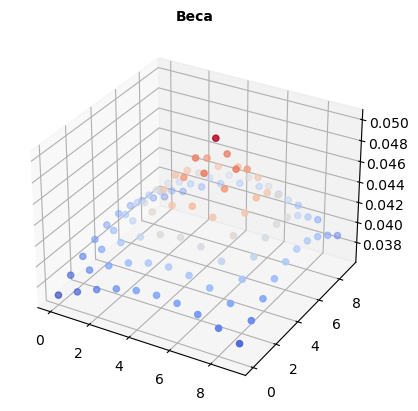

In [37]:
X, Y = np.meshgrid(range(n), range(n))
X = X.ravel()
Y = Y.ravel()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X, Y, w, c = w, cmap=cm.coolwarm)
ax.set_title(f"Веса", fontsize = 10, fontweight='bold')

plt.show()

На графике выше визуализированны стоимости домов в городе: в центре самые дорогие, на окраинах бедные.

__Задача 2. $\triangle$ (20 баллов)__ Рассмотрим следующую билинейную задачу на симплексах:
$$
\min_{x \in \mathcal{X}} \max_{y \in \mathcal{Y}} f(x,y) = x^T A y,
$$
где $X = \{ x \in \mathbb{R}^d \mid x_i \geq 0 , \sum_{i=1}^d x_i = 1\}$, $Y = \{ y \in \mathbb{R}^d \mid y_i \geq 0 , \sum_{i=1}^d x_i = 1\}$, $A \in \mathbb{R^{d \times d}}$.

Такую задачу часто называют матричной игрой. В этом задании будет конкретная игра "Вор и полицейский".

Пусть город представляет собой квадрат из $n \times n$ маленьких квадратиков. В каждом квадратике стоит дом и полицейская будка рядом с ним. Пусть так же известны ценность дома для вора $w_{i}$ в квадрате $i$. Каждую ночь вор выбирает, какой дом ограбить, а полицейский выбирает будку, в которой будет дежурить. Вероятность поимки вора, если вор грабит дом в квадрате $j$, а полисмен дежурит в квадрате $i$ равна:
    $$\exp(- \alpha  \cdot \text{dist}(i,j)).$$ 
Здесь $\alpha > 0$ - некторый параметр, т.е. вероятность уменьшается с увеличением расстояния между квадратами.
Вор хочет максимизировать свою ожидаемую прибыль:
    $$w_j \l(1 -  \exp(- \alpha \cdot \text{dist}(i,j))r).$$
Полицейский наоборот - минимизировать.

Такую постановку можно формализовать в виде матричной игры: занумеруем все дома от $0$ до $d = n^2 - 1$, получится вектор $w \in \mathbb{R}^{d}$ стоимостей домов. В элемент $A_{ij}$ матрицы $A$ запишем:
$$A_{ij} = w_j \l(1 - \exp(- \alpha \cdot \text{dist}(i,j))\r),$$
т.е. ожидаемую прибыль вора, если он будет грабить дом с номером $j$, а полицейский дежурить в доме с номером $i$. В векторах $x$ и $y$ будут хранится вероятностные стратегии для полицийского и вора: вероятность выбрать тот или иной дом для дежурства или грабежа. Цель задания найти равновестные стратегии. 

Для игровой задачи запишите явный вид метода, для которого доказывали сходимость в Задаче 1 (на лекции мы тоже работали с симплексом). Реализуйте в виде кода.

$$f(x, y) = x^T A y \text{    на симплексе}$$
$$z = \binom{x}{y} \quad F(z) = F(x,y) = \binom{\nabla_x f(x, y)}{- \nabla_y f(x, y)} = \binom{Ay}{- x^TA} $$
\begin{align}
z^{k+1/2} &= \arg\min_{z \in \mathcal{Z}} (\gamma\langle F(z^k), z\rangle + V(z,z^k))
\\
z^{k+1} &= \arg\min_{z \in \mathcal{Z}} (\gamma\langle F(z^{k+1/2}), z\rangle + V(z,z^k)).
\end{align}
$$V(x, y) = \sum_{i=1}^d x_i \log\l(\frac{x_i}{y_i}\r)$$

Выпишем лагранжиан:
$L(z, \lambda, \nu) = \langle \gamma\langle F(z^k), z\rangle - \sum_{i=1}^d \lambda_i z_i + \nu \l(\sum_i^{d}z_i - 1\r)$

__КОММЕНТАРИЙ: 3/20 баллов__

Оцените константу $L$ (смотри Задачу 1) для игровой задачи. В качестве критерия используйте следующее выражение:
$$
\text{gap}(x^k, y^k) = \max_{y \in \mathcal{Y}} f(x^k, y) - \min_{x \in \mathcal{X}} f(x, y^k), \quad \text{или} \quad \text{gap}\l( \frac{1}{k} \sum_{i=0}^{k-1} x^i, \frac{1}{k}\sum_{i=0}^{k-1} y^k \r)
$$
Выпишите явный вид подсчета $\text{gap}(x^k, y^k)$ и реализуйте его (задача не зря называется билинейной).

In [38]:
#ваше решение (Code и Markdown)

С помощью реализованного метода решите игровую задачу. Рекомендуется подбирать шаг и брать его значительно больше $\frac{1}{L}$. Постройте график сходимости: значение критерия сходимости от номера итерации.

In [39]:
#ваше решение (Code и Markdown)

Визуализируйте решение $x^*$ и $y^*$ на карте города. В этом может помочь визуализация весов выше. Сделайте вывод. Насколько результат кажется натуральным и интепретируемым?

In [40]:
#ваше решение (Code и Markdown)